# <p style="text-align:center;">**BIKE SHARING**</p>
##### <p style="text-align:center;">**Annisa Dwi Ari**</p>
---

[sumber data bike sharing](http://capitalbikeshare.com/system-data)

## **Contents** 

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


## **Business Problem Understanding**

### **Context**

Sistem *sharing* sepeda merupakan generasi baru dari penyewaan sepeda tradisional di mana seluruh proses, mulai dari keanggotaan, penyewaan, hingga pengembalian, menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan mengembalikannya di lokasi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, minat besar ada pada sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain dari aplikasi dunia nyata yang menarik dari sistem *sharing* sepeda, karakteristik data yang dihasilkan oleh sistem-sistem ini membuat menarik untuk dilakukan penelitian. Berbeda dengan layanan transportasi lain seperti bis atau kereta bawah tanah, durasi perjalanan, titik keberangkatan, dan titik kedatangan secara eksplisit tercatat dalam sistem-sistem ini. Fitur ini menjadikan sistem *sharing* sepeda sebagai jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan bahwa peristiwa-peristiwa penting di kota dapat dideteksi dengan memantau data-data ini.



### **Problem statement**

Dalam era sistem sharing sepeda yang otomatis, di mana pengguna dapat dengan mudah menyewa dan mengembalikan sepeda dari lokasi tertentu, data yang dihasilkan oleh sistem ini menjadi sumber informasi berharga untuk analisis mobilitas di kota. Namun, tantangan utama yang dihadapi adalah meningkatkan kinerja model prediksi untuk membantu dalam pengelolaan dan pengoptimalan layanan sepeda berbagi. Dengan melibatkan fitur-fitur seperti durasi perjalanan, titik keberangkatan, titik kedatangan, serta faktor-faktor cuaca, pengembangan model prediksi yang akurat dapat memberikan wawasan penting tentang mobilitas kota dan memfasilitasi pengambilan keputusan yang lebih efektif.

### **Goals**

Tujuan ini dapat membantu dalam meningkatkan efisiensi, ketersediaan, dan kualitas layanan bike sharing serta memberikan manfaat yang lebih besar bagi pengguna dan komunitas secara keseluruhan.

### **Analytic Approach**

1. **Exploratory Data Analysis (EDA):**

Memahami karakteristik data dan distribusi fitur-fitur yang tersedia, termasuk durasi perjalanan, waktu (jam), cuaca, musim, dan jumlah pengguna sepeda.
Menganalisis pola dan hubungan antara fitur-fitur yang ada untuk memahami dinamika penggunaan sepeda di kota.

2. **Feature Engineering:**

Memilih dan menggabungkan fitur-fitur yang paling informatif untuk memperkuat kemampuan model dalam memprediksi harga sewa sepeda.
Melakukan transformasi atau normalisasi data jika diperlukan untuk meningkatkan kinerja model.

3. **Model Development:**

Memilih model regresi yang sesuai, seperti DecisionTreeRegressor dan RandomForestRegressor, untuk memprediksi harga sewa sepeda.
Mengembangkan model menggunakan data latih dan melakukan penyetelan hyperparameter untuk meningkatkan kinerja.

4. **Model Evaluation:**

Mengevaluasi kinerja model menggunakan metrik evaluasi seperti Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan Mean Absolute Percentage Error (MAPE).
Membandingkan kinerja model sebelum dan sesudah penyetelan untuk mengukur peningkatan kinerja yang dicapai.


### **Metric Evaluation**


Untuk mengevaluasi kinerja model, akan digunakan metrik evaluasi standar untuk regresi, termasuk Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan Mean Absolute Percentage Error (MAPE). Metrik-metrik ini akan digunakan untuk membandingkan kinerja model sebelum dan sesudah penyetelan. Selain itu, akan dilakukan evaluasi menggunakan skor cross-validation untuk memvalidasi kinerja model secara keseluruhan. Hasil evaluasi ini akan memberikan wawasan tentang seberapa baik model dapat memprediksi jumlah total sepeda yang dipinjam, serta membantu dalam menentukan apakah penyetelan model telah berhasil meningkatkan kinerjanya.

## **DATA UNDERSTANDING**
- Dataset merupakan data penggunaan sharing bike pada tahun 2011 sampai 2012 
- Setiap baris data memberikan informasi tentang penggunaan sepeda pada hari tertentu.

### **Attributes Information**
| **Column**  | **Data Type** | **Deskripsi**                                                                                      |
|-------------|---------------|---------------------------------------------------------------------------------------------------|
| dteday      | object        | date                                                                                           |
| season      | float64       | season (1: winter, 2: spring, 3: summer, 4: fall)                                             |
| hr          | int64         | hour (0 to 23)                                                                                 |
| holiday     | int64         | holiday or not                                                                                  |
| temp        | int64         | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| atemp       | float64       | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| hum         | float64       | normalized humidity. The values are divided into 100 (max)                                   |
| casual      | int64         | count of casual users                                                                          |
| registered  | int64         | count of registered users                                                                         |
| cnt         | int64         | count of total rental bikes including both casual and registered                          |
| weathersit  | int64         | 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3:  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |


## **Library**

In [1]:
# dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV, cross_val_score, RandomizedSearchCV,ShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# modelling
from sklearn.linear_model import LinearRegression,Lasso,Ridge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor



from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data = pd.read_csv('data_bike_sharing.csv')
data

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


Pada dataset bike sharing terdapat 12.165 baris dan 11 kolom data

In [3]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null_values': data.isna().sum(),
    'percentage of null_values': data.isna().mean().values * 100,
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null_values,percentage of null_values,n_unique,sample_unique
dteday,dteday,object,0,0.0,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-3..."
hum,hum,float64,0,0.0,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
weathersit,weathersit,int64,0,0.0,4,"[1, 2, 3, 4]"
holiday,holiday,int64,0,0.0,2,"[0, 1]"
season,season,int64,0,0.0,4,"[4, 2, 3, 1]"
atemp,atemp,float64,0,0.0,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515..."
temp,temp,float64,0,0.0,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82..."
hr,hr,int64,0,0.0,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21,..."
casual,casual,int64,0,0.0,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, ..."
registered,registered,int64,0,0.0,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 2..."


Jika dilihat pada informasi diatas, dataset ini tidak terdapat nilai yang hilang atau missing value di semua kolomnya sehingga tidak perlu dilakukan untuk cleaning data

In [4]:
# Mengubah tipe data pada kolom dteday
data['dteday'] = pd.to_datetime(data['dteday'])

# Mencari rentang tahun
dari_tahun = data['dteday'].dt.year.min()
sampai_tahun = data['dteday'].dt.year.max()

print("Min = ",dari_tahun,"Max = ", sampai_tahun)

Min =  2011 Max =  2012


Dataset ini merupakan data bike sharing dari tahun 2011 sampai dengan tahun 2012

### **KORELASI**

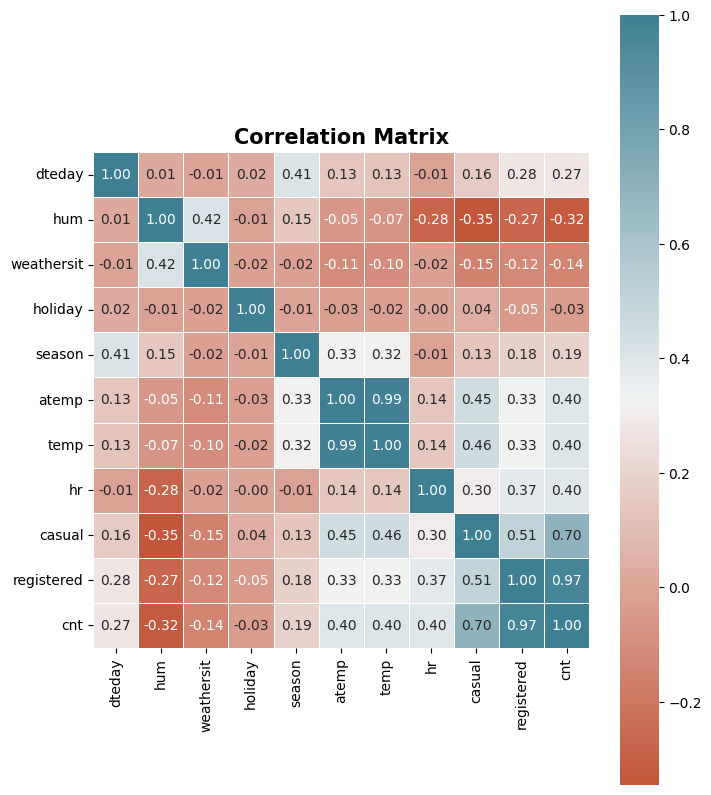

In [30]:
# Correlation matrix
plt.figure(figsize=(8,10))
palette=sns.diverging_palette(20, 220, n=256)
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Berdasarkan korelasi tersebut ternyata terdapat beberapa kolom yang memiliki korelasi yang lebih dari 0.50 dimana korelasi yang memiliki rentang 0.50-0.69 dapat dikatakan korelasi yang moderat (cukup kuat) sedangkan korelasi lebih dari atau sama dengan 0.70 memiliki korelasi yang sangat kuat. 

Adapun kolom yang memiliki korelasi cukup kuat adalah :
- casual dengan registered dengan korelasi (0.51)

Sedangkan, kolom yang memiliki korelasi sangat kuat adalah :
- casual dengan cnt dengan korelasi (0.70)
- registered dengan cnt dengan korelasi (0.97)
- temp dengan atemp dengan korelasi (0.99)

In [47]:
data[data.duplicated()]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt


In [44]:
weather = data['weathersit'].value_counts()
weather

weathersit
1    8071
2    3119
3     972
4       3
Name: count, dtype: int64

In [45]:
weather/len(data['weathersit'])*100

weathersit
1    66.346075
2    25.639129
3     7.990136
4     0.024661
Name: count, dtype: float64

In [32]:
holiday = data['holiday'].value_counts()
holiday

holiday
0    11803
1      362
Name: count, dtype: int64

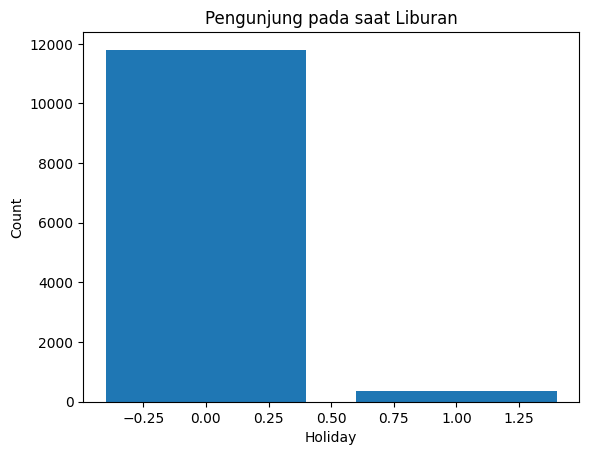

In [34]:
# Membuat diagram batang
plt.bar(holiday.index, holiday.values)

# Memberikan label sumbu x dan y serta judul diagram
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Pengunjung pada saat Liburan')

# Menampilkan diagram
plt.show()

In [42]:
season = data['season'].value_counts().sort_values(ascending=False)
season

season
3    3169
2    3074
1    3023
4    2899
Name: count, dtype: int64

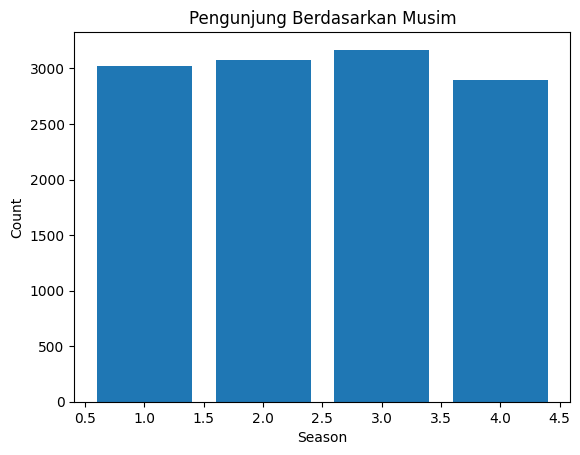

In [43]:
# Membuat diagram batang
plt.bar(season.index, season.values)

# Memberikan label sumbu x dan y serta judul diagram
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Pengunjung Berdasarkan Musim')

# Menampilkan diagram
plt.show()

In [9]:
data.groupby('season')['holiday'].value_counts()

season  holiday
1       0          2905
        1           118
2       0          3008
        1            66
3       0          3093
        1            76
4       0          2797
        1           102
Name: count, dtype: int64

Berdasarkan data dapat dilihat beberapa informasi yaitu :
- Banyaknya customer yang menyewa sepeda pada masa liburan, pada masa liburan dapat dilihat bahwa terjadi kenaikan yang sangat signifikan yaitu 4 kali lipat dibandingkan masa bukan liburan

- Musim panas menjadi musim yang dengan peminat tertinggi dengan customer sebanyak 3200 customer, sedangkan musim gugur menjadi musim yang paling sedikit peminatnya. musim panas sering dianggap sebagai waktu liburan atau musim liburan sedangkan musim gugur mungkin memiliki jumlah pelanggan yang lebih rendah karena faktor-faktor seperti kembalinya orang-orang ke rutinitas mereka setelah liburan musim panas.

- Cuaca dengan intensitas cerah menjadi salah satu faktor untuk customer melakukan penyewaan sepeda ini, hal ini dibuktikan dengan jumlah customer yang tinggi yaitu 67% dari seluruh customer yang ada

## **MODELLING**

In [10]:
data.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [11]:
# menentukan fitur (X) dan target (y)
# fitur
X = data[['A', 'weathersit', 'temp', 'hr', 'holiday', 'season']]

# target
y= data['cnt']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2024
)

In [13]:
# untuk kasih tau mana model kita yang paling bagus

linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
lasso = Lasso()
svr = SVR()
ridge = Ridge()

In [14]:
# Model Benchmarking
models = {
    'Linear Regression': linreg,
    'KNN Regression': knn,
    'Decision Tree Regression': tree,
    'Random Forest Regression': rf,
    'SVR' : svr,
    'Lasso' : lasso,
    'Ridge' : ridge
}

# Penskalaan data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fungsi untuk menghitung MAPE secara manual
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menyimpan hasil evaluasi
results = {
    'Model': [],
    'Avg MAPE': [],
    'Std MAPE': [],
    'Avg RMSE': [],
    'Std RMSE': [],
    'Avg MAE': [],
    'Std MAE': []
}

# Cross validation
for model_name, model in models.items():
    scoring = {
        'MAE': 'neg_mean_absolute_error',
        'RMSE': 'neg_root_mean_squared_error',
        'MAPE': make_scorer(mape)
    }
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=3, scoring=scoring)

    results['Model'].append(model_name)
    results['Avg MAPE'].append(np.mean(cv_results['test_MAPE']))  
    results['Std MAPE'].append(np.std(cv_results['test_MAPE']))
    results['Avg RMSE'].append(np.mean(-cv_results['test_RMSE']))  
    results['Std RMSE'].append(np.std(-cv_results['test_RMSE']))  
    results['Avg MAE'].append(np.mean(-cv_results['test_MAE']))  
    results['Std MAE'].append(np.std(-cv_results['test_MAE']))  

In [15]:
result = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest','SVR','Lasso','Ridge'],
    'Mean_MAPE': results['Avg MAPE'],
    'Std_MAPE': results['Std MAPE'],
    'Mean_RMSE': results['Avg RMSE'],
    'Std_RMSE': results['Std RMSE'],
    'Mean_MAE': results['Avg MAE'],
    'Std_MAE': results['Std MAE']
})
result

,Model,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,316.686946,10.275502,147.873228,2.714635,109.150609,1.200560
1,KNN Regressor,120.717029,3.524784,113.089110,2.808151,76.217324,1.501369
2,DecisionTree Regressor,107.913042,5.394150,138.751631,2.560239,88.898330,1.694095
3,RandomForest,94.851918,4.797098,107.483169,1.726230,70.863127,0.868976
4,SVR,180.017715,2.465620,146.816506,3.198222,94.144820,1.481673
5,Lasso,319.094593,10.810494,147.882113,2.721595,109.116067,1.199330
6,Ridge,316.710643,10.279192,147.873218,2.714468,109.150694,1.200280


RandomForest memiliki nilai yang lebih rendah untuk MAPE, RMSE, dan MAE, menunjukkan kinerja yang lebih baik secara keseluruhan. selain itu, decision tree regressor juga menjadi model yang terbaik

In [16]:
models = {
    'DecisionTreeRegressor' : tree,
    'RandomForest':rf
}

# Lists to store scores
score_rmse = []
score_mae = []
score_mape = []

# Prediction on test set
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    score_rmse.append(rmse)
    score_mae.append(mae)
    score_mape.append(mape)


In [17]:
# Create DataFrame for scores
sebelum_tuning = pd.DataFrame({
    'RMSE': score_rmse, 
    'MAE': score_mae, 
    'MAPE': score_mape
}, index=models.keys())
sebelum_tuning

,RMSE,MAE,MAPE
DecisionTreeRegressor,133.908037,84.646249,1.046047
RandomForest,107.645255,70.009743,0.898247


Dari hasil evaluasi tersebut, terlihat bahwa model Random Forest memiliki performa yang lebih baik daripada model Decision Tree Regressor, karena memiliki nilai RMSE, MAE, dan MAPE yang lebih rendah. Ini menandakan bahwa Random Forest memberikan prediksi yang lebih akurat dalam memodelkan hubungan antara variabel independen dan variabel dependen dalam dataset yang digunakan. Oleh karena itu, untuk kasus ini, Random Forest bisa dianggap sebagai pilihan model yang lebih baik.


## hyperparameter tuning randomforestregression

In [18]:
rf_reg=RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]


In [19]:
# Buat Random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [20]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = cv, verbose=2, n_jobs = 1)

In [21]:
rf_random .fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=  11.0s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=  10.9s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=  13.6s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=  10.4s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=  10.7s
[CV] END ..max_depth=25, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=25, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=25, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=25, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=25, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=40, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=40, max_features=auto, n_estimators=800; total time=   0.0s
[CV] END ..max_depth=40, max

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=10, test_size=0.25, train_size=None),
                   estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}

hasil parameter terbaik yang ditemukan adalah 'n_estimators': 200, 'max_features': 'sqrt', dan 'max_depth': 20. 

- menggunakan 200 pohon keputusan (n_estimators), model memiliki kapasitas yang cukup besar untuk menangkap hubungan yang kompleks dalam data. 

- 'sqrt' untuk parameter 'max_features' menunjukkan bahwa setiap pohon keputusan hanya menggunakan akar kuadrat dari total jumlah fitur untuk membangun pemisah, yang dapat membantu mencegah overfitting dan meningkatkan generalisasi model.

- Kedalaman maksimum pohon keputusan yang dibatasi pada 20 (max_depth), model menjadi lebih terbatas dalam kompleksitasnya, menghindari pembentukan pohon yang sangat dalam yang mungkin cenderung overfitting terhadap data latih. 

In [27]:
rf_reg_best = RandomForestRegressor(n_estimators=1000, max_features='sqrt', max_depth=15)

#  cross-validation score
cv_scores = cross_val_score(rf_reg_best, X_train_scaled, y_train, cv=5)

# cross-validation score
avg_cv_score = np.mean(cv_scores)
avg_cv_score

0.6930639874965483

0.693 merupakan nilai rata-rata dari skor cross-validation model Random Forest setelah tuning, menunjukkan bahwa model tersebut mampu menjelaskan sekitar 69.3% variabilitas dalam data uji, yang merupakan indikasi kinerja yang layak.

In [24]:
rf_reg_rf_best=RandomForestRegressor(n_estimators=1000,max_features='sqrt',max_depth=15)
rf_reg_rf_best.fit(X_train,y_train)
y_pred_rf_best=rf_reg_rf_best.predict(X_test)
y_pred_rf_best

array([328.83517864,  21.03496159,  33.37298754, ...,  54.18083605,
       360.19528702, 244.8637418 ])

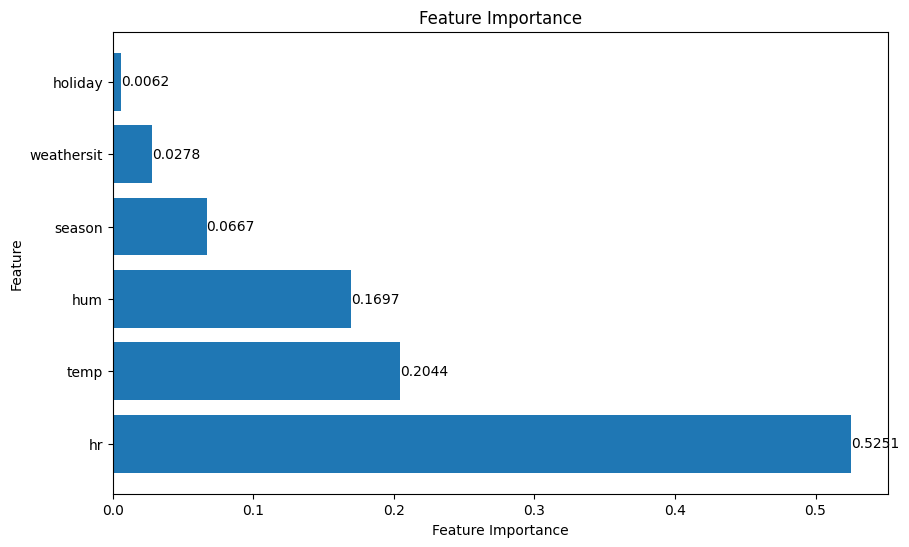

In [48]:
# Mendapatkan model terbaik dari hasil RandomizedSearchCV
best_rf_model = rf_random.best_estimator_

# Fit model terbaik ke data latih
best_rf_model.fit(X_train_scaled, y_train)

# Mendapatkan feature importance
feature_importance = best_rf_model.feature_importances_

# Mendapatkan nama fitur
feature_names = X.columns

# Mengurutkan fitur penting dari yang tertinggi
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Menampilkan visualisasi fitur penting yang diurutkan
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Menampilkan nilai dari setiap bar
for bar, value in zip(bars, sorted_feature_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.4f}'.format(value), 
             va='center', ha='left')

plt.show()

# **CONCLUSION**

- Sebelum tuning, model DecisionTreeRegressor dan RandomForest menunjukkan kinerja yang cukup baik, tetapi dengan nilai RMSE, MAE, dan MAPE yang beragam.
- Setelah dilakukan tuning, model RandomForest mengalami peningkatan kinerja yang signifikan dengan memperoleh parameter terbaik yaitu {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}.
- Skor cross-validation yang tinggi, mencapai 0.693, menunjukkan bahwa model RandomForest yang disesuaikan mampu memprediksi dengan akurat.
- Prediksi model setelah tuning memiliki rentang nilai yang luas, memberikan fleksibilitas yang baik dalam menghadapi berbagai situasi.
- Fitur yang paling berpengaruh adalah hr,temp dan hum
Secara keseluruhan, proses tuning berhasil meningkatkan kinerja model RandomForest secara substansial, menghasilkan model yang lebih dapat diandalkan dalam memprediksi data.

# **RECOMMENDATION**

1. Menerapkan Model RandomForest yang Sudah Di-tuning: Model RandomForest telah mengalami peningkatan kinerja yang signifikan setelah tuning, sehingga rekomendasi pertama adalah untuk mengimplementasikan model ini dalam operasional layanan bike sharing. Dengan parameter terbaik yang telah ditentukan, model ini dapat memberikan prediksi yang lebih akurat tentang ketersediaan sepeda, efisiensi penggunaan, dan kualitas layanan.

2. Memperhatikan Fitur yang Paling Berpengaruh: Fitur-fitur yang paling berpengaruh dalam model, seperti waktu (hr), suhu (temp), kelembaban (hum), harus mendapat perhatian khusus dalam pengelolaan layanan. Data historis dan realtime dari fitur-fitur ini harus dikumpulkan secara teratur dan diperbarui untuk memastikan prediksi yang akurat.

3. Pemantauan dan Evaluasi Berkelanjutan: Meskipun model telah ditune dan terbukti mampu memberikan prediksi yang akurat, penting untuk terus memantau kinerja model secara berkala. Hal ini dapat dilakukan dengan melakukan evaluasi berkala terhadap prediksi model dan membandingkannya dengan data aktual. Jika ditemukan ketidaksesuaian atau penurunan kinerja, model harus direvisi atau di-tune kembali.

4. Memperluas Penelitian terhadap Variabel Lain: Meskipun fitur-fitur yang telah diidentifikasi memiliki pengaruh yang signifikan dalam model, tidak ada salahnya untuk memperluas penelitian terhadap variabel lain yang mungkin juga memengaruhi ketersediaan, efisiensi, dan kualitas layanan bike sharing. Dengan memperluas cakupan penelitian, kita dapat memperoleh pemahaman yang lebih komprehensif tentang faktor-faktor yang memengaruhi operasional layanan.

# **SAVE MODEL**

In [28]:
# import joblib

# joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']